<b>Parallel Programming</b> - For CPU intensive tasks.<br>
<b>Asynchronous Programming</b> - For I/O intensive tasks.

### Threading
<b>Process</b> - A running instance of a computer program.<br>
<b>Thread</b> - The smallest section of instructions that can be managed by the operating system.<br><br>
When multiple cores are available, each thread can be computed parallely in different cores.

In [1]:
import threading
from datetime import datetime

In [2]:
def do_some_work(val):
    print('doing some work in thread')
    print('echo: {}'.format(val))
    return

val = 'text'
# target: the function to be executed by thread
t = threading.Thread(target=do_some_work, args=(val,))
# To start a thread, we use start method of Thread class.
t.start()
# Once a thread is started the further code will still keep running.
# join() will stop the main execution until this thread is complete.
# Look at the 2 cells below to get the purpose of t.join()
t.join()

doing some work in thread
echo: text


In [3]:
# Whithout t.join() the main code will not stop.
import time
def do_some_work():
    time.sleep(3)
    print('doing some work in thread')
    return

t = threading.Thread(target=do_some_work)
t.start()
print('doing this after thread is started')
t.join()

doing this after thread is started
doing some work in thread


In [4]:
# With t.join() the main code will wait for thread to complete
def do_some_work():
    time.sleep(3)
    print('doing some work in thread')
    return

t = threading.Thread(target=do_some_work)
t.start()
t.join()
print('doing this after thread is started')

doing some work in thread
doing this after thread is started


In [5]:
# We can also create a class with threading property
# For example the class below inherrites class Thread for thread processing
class FibonacciThread(threading.Thread):
    # When we override __init__ we have to first call __init__ of thread, then we can add functionalities of our new class
    def __init__(self, num):
        threading.Thread.__init__(self)
        self.num = num
    # The run function inside will be called when we start() the object
    def run(self):
        print('Thread processing started\n')
        fib = [0] * (self.num + 1)
        fib[0] = 0
        fib[1] = 1
        for i in range(2, self.num+1):
            fib[i] = fib[i - 1] + fib[i - 2]
        print(fib)
        print(self.num, 'done')

myFibTask1 = FibonacciThread(9)
myFibTask2 = FibonacciThread(12)
print('before thread starts.')
myFibTask1.start()
myFibTask2.start()

myFibTask1.join()
myFibTask2.join()

before thread starts.
Thread processing started

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]
9 done
Thread processing started

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144]
12 done


In [6]:
def waitProcess(n):
    current_time = datetime.now().strftime("%H:%M:%S")
    # print(n, current_time)
    time.sleep(3)
    return

print('loop started at', datetime.now().strftime("%H:%M:%S"))
for i in range(9):
    waitProcess(i)
    
print('loop finished at', datetime.now().strftime("%H:%M:%S"))

loop started at 12:21:41
loop finished at 12:22:08


In [7]:
def waitProcess(n):
    current_time = datetime.now().strftime("%H:%M:%S")
    # print(n, current_time)
    time.sleep(3)
    return

threads = []
print('loop started at', datetime.now().strftime("%H:%M:%S"))
for i in range(2000):
    t = threading.Thread(target=waitProcess, args=(i,))
    t.start()
    threads.append(t)
for t in threads:
    t.join()
print('loop finished at', datetime.now().strftime("%H:%M:%S"))

loop started at 12:22:08
loop finished at 12:22:12


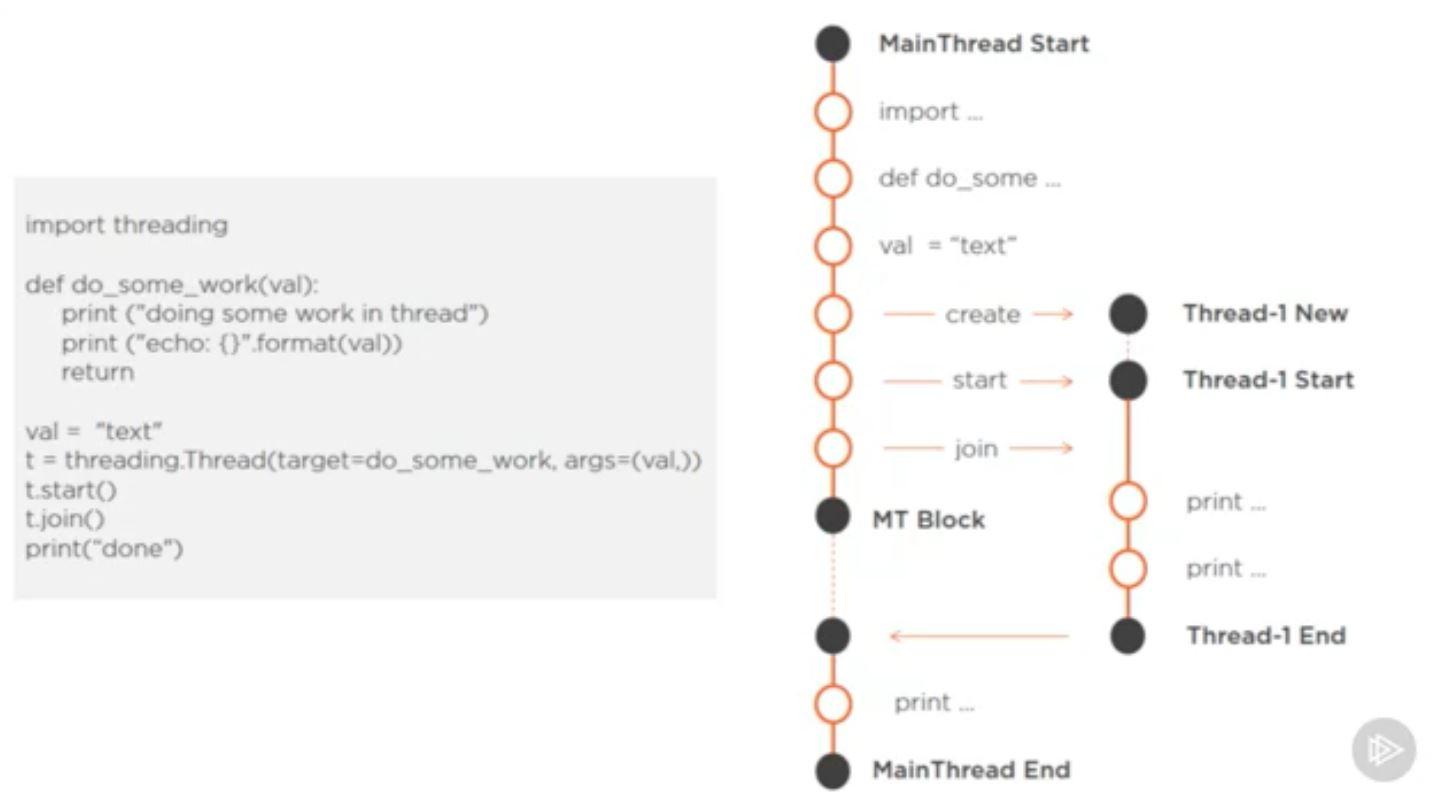
<b>The Scheduler</b> - An operating system module that selects the next job to be admitted into the system and the next process to run. Scheduler can also suspend a thread mid execution so that other threads also get a chance to be executed.<br>
<b>Context Switch</b> - The process of saving and restoring the state of a thread or a process.<br>
If context switch is switching from thread to thread under the same process it will consume less memory but it also has a downside known as <b>Thread Interference</b>.<br>
Thread interference occurs when two threads are trying to update the same variable.
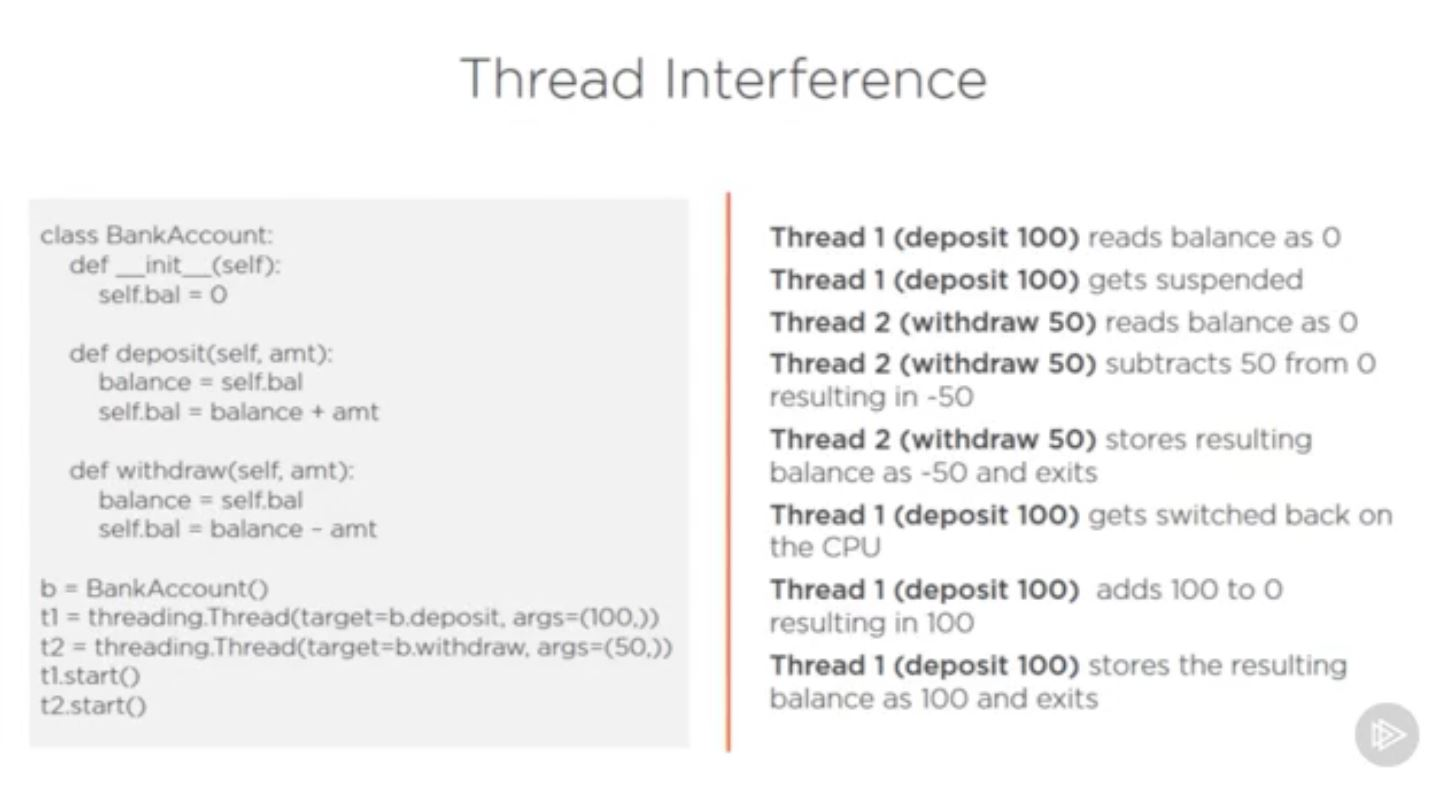

### Thread Synchronization
The synchronization can be achieved by using <b>threading.Lock</b><br>
If a lock has been aquired by a thread it can only be released by that particular thread. So if a thread tries to unlock a lock which is of some other thread it goes into block state, and wait for the original thread to unlock that lock. This hence solves the problem of Thread Interference.<br>
However the more shared memory we use between threads the more ineffective threading will be.

In [8]:
def do_some_work():
    lock = threading.Lock()
    # with lock is doing two things - lock.aquire() and lock.release() at end of process
    # with statement ensures that even if process throws some error, the aquired lock is released.
    with lock:
        for i in range(3):
            print('printing check', i)
    return

t = threading.Thread(target=do_some_work)
t.start()
t.join()

printing check 0
printing check 1
printing check 2


<b>threading.Semaphore</b> - This is used when we want to set a numeric limit to concurrent runs of a function. When arg is 1 it functions same as threading.Lock<br>
Its always safe to use BoundedSemaphore, as if in some exceptional case semaphore is released more times than it is aquired, boundedsemaphore will throe error.

In [9]:
semaphore = threading.BoundedSemaphore(3)
def waitProcess(n):
    with semaphore:
        current_time = datetime.now().strftime("%H:%M:%S")
        print(n, current_time)
        time.sleep(3)
        return

threads = []
for i in range(9):
    t = threading.Thread(target=waitProcess, args=(i,))
    t.start()
    threads.append(t)
for t in threads:
    t.join()

0 12:22:12
1 12:22:12
2 12:22:12
3 12:22:15
4 12:22:15
5 12:22:15
7 12:22:18
6 12:22:18
8 12:22:18


In [10]:
semaphore = threading.BoundedSemaphore(2)
def waitProcess(n):
    with semaphore:
        current_time = datetime.now().strftime("%H:%M:%S")
        print(n, current_time)
        time.sleep(3)
        return

threads = []
for i in range(9):
    t = threading.Thread(target=waitProcess, args=(i,))
    t.start()
    threads.append(t)
for t in threads:
    t.join()

0 12:22:21
1 12:22:21
3 12:22:24
2 12:22:24
4 12:22:27
5 12:22:27
6 12:22:30
7 12:22:30
8 12:22:33


### Thumbnail maker
usecase for this course.

In [11]:
# thumbnail_maker.py
import time
import os
import logging
from urllib.parse import urlparse
from urllib.request import urlretrieve
from queue import Queue
from threading import Thread

import PIL
from PIL import Image

FORMAT = "[%(threadName)s, %(asctime)s, %(levelname)s] %(message)s"
logging.basicConfig(filename='logfile.log', level=logging.DEBUG, format=FORMAT)

class ThumbnailMakerService(object):
    def __init__(self, home_dir='.'):
        self.home_dir = home_dir
        self.input_dir = self.home_dir + os.path.sep + 'incoming'
        self.output_dir = self.home_dir + os.path.sep + 'outgoing'
        self.img_queue = Queue()
        self.dl_queue = Queue()

    def download_image(self):
        while not self.dl_queue.empty():
            try:
                url = self.dl_queue.get(block=False)
                # download each image and save to the input dir
                img_filename = urlparse(url).path.split('/')[-1]
                urlretrieve(url, self.input_dir + os.path.sep + img_filename)
                self.img_queue.put(img_filename)

                self.dl_queue.task_done()
            except Queue.Empty:
                logging.info('Queue empty')

    def download_images(self, img_url_list):
        # validate inputs
        if not img_url_list:
            return
        os.makedirs(self.input_dir, exist_ok=True)

        logging.info("beginning image downloads")

        start = time.perf_counter()
        for url in img_url_list:
            # download each image and save to the input dir
            img_filename = urlparse(url).path.split('/')[-1]
            urlretrieve(url, self.input_dir + os.path.sep + img_filename)
            self.img_queue.put(img_filename)
        end = time.perf_counter()

        self.img_queue.put(None)
        logging.info("downloaded {} images in {} seconds".format(len(img_url_list), end - start))

    def perform_resizing(self):
        # validate inputs
        os.makedirs(self.output_dir, exist_ok=True)

        logging.info("beginning image resizing")
        target_sizes = [32, 64, 200]
        num_images = len(os.listdir(self.input_dir))

        start = time.perf_counter()
        while True:
            filename = self.img_queue.get()
            if filename:
                logging.info("resizing image {}".format(filename))
                orig_img = Image.open(self.input_dir + os.path.sep + filename)
                for basewidth in target_sizes:
                    img = orig_img
                    # calculate target height of the resized image to maintain the aspect ratio
                    wpercent = (basewidth / float(img.size[0]))
                    hsize = int((float(img.size[1]) * float(wpercent)))
                    # perform resizing
                    img = img.resize((basewidth, hsize), PIL.Image.LANCZOS)

                    # save the resized image to the output dir with a modified file name
                    new_filename = os.path.splitext(filename)[0] + \
                        '_' + str(basewidth) + os.path.splitext(filename)[1]
                    img.save(self.output_dir + os.path.sep + new_filename)

                os.remove(self.input_dir + os.path.sep + filename)
                logging.info("done resizing image {}".format(filename))
                self.img_queue.task_done()
            else:
                self.img_queue.task_done()
                break
        end = time.perf_counter()

        logging.info("created {} thumbnails in {} seconds".format(num_images, end - start))

    def make_thumbnails(self, img_url_list):
        logging.info("START make_thumbnails")

        start = time.perf_counter()

        for img_url in img_url_list:
            self.dl_queue.put(img_url)

        num_dl_threads = 4
        for _ in range(num_dl_threads):
            t = Thread(target=self.download_image)
            t.start()

        t2 = Thread(target=self.perform_resizing)
        t2.start()

        self.dl_queue.join()
        self.img_queue.put(None)
        t2.join()

        end = time.perf_counter()
        logging.info("END make_thumbnails in {} seconds".format(end - start))


In [12]:
IMG_URLS = \
    ['https://dl.dropboxusercontent.com/s/2fu69d8lfesbhru/pexels-photo-48603.jpeg',
     'https://dl.dropboxusercontent.com/s/zch88m6sb8a7bm1/pexels-photo-134392.jpeg',
     'https://dl.dropboxusercontent.com/s/lsr6dxw5m2ep5qt/pexels-photo-135130.jpeg',
     'https://dl.dropboxusercontent.com/s/6xinfm0lcnbirb9/pexels-photo-167300.jpeg',
     'https://dl.dropboxusercontent.com/s/2dp2hli32h9p0y6/pexels-photo-167921.jpeg',
     'https://dl.dropboxusercontent.com/s/fjb1m3grcrceqo2/pexels-photo-173125.jpeg',
     'https://dl.dropboxusercontent.com/s/56u8p4oplagc4bp/pexels-photo-185934.jpeg',
     'https://dl.dropboxusercontent.com/s/2s1x7wz4sdvxssr/pexels-photo-192454.jpeg',
     'https://dl.dropboxusercontent.com/s/1gjphqnllzm10hh/pexels-photo-193038.jpeg',
     'https://dl.dropboxusercontent.com/s/pcjz40c8pxpy057/pexels-photo-193043.jpeg',
     'https://dl.dropboxusercontent.com/s/hokdfk7y8zmwe96/pexels-photo-207962.jpeg',
     'https://dl.dropboxusercontent.com/s/k2tk2co7r18juy7/pexels-photo-247917.jpeg',
     'https://dl.dropboxusercontent.com/s/m4xjekvqk4rksbx/pexels-photo-247932.jpeg',
     'https://dl.dropboxusercontent.com/s/znmswtwhcdbpc10/pexels-photo-265186.jpeg',
     'https://dl.dropboxusercontent.com/s/jgb6n4esquhh4gu/pexels-photo-302899.jpeg',
     'https://dl.dropboxusercontent.com/s/rjuggi2ubc1b3bk/pexels-photo-317156.jpeg',
     'https://dl.dropboxusercontent.com/s/cpaog2nwplilrz9/pexels-photo-317383.jpeg',
     'https://dl.dropboxusercontent.com/s/16x2b6ruk18gji5/pexels-photo-320007.jpeg',
     'https://dl.dropboxusercontent.com/s/xqzqzjkcwl52en0/pexels-photo-322207.jpeg',
     'https://dl.dropboxusercontent.com/s/frclthpd7t8exma/pexels-photo-323503.jpeg',
     'https://dl.dropboxusercontent.com/s/7ixez07vnc3jeyg/pexels-photo-324030.jpeg',
     'https://dl.dropboxusercontent.com/s/1xlgrfy861nyhox/pexels-photo-324655.jpeg',
     'https://dl.dropboxusercontent.com/s/v1b03d940lop05d/pexels-photo-324658.jpeg',
     'https://dl.dropboxusercontent.com/s/ehrm5clkucbhvi4/pexels-photo-325520.jpeg',
     'https://dl.dropboxusercontent.com/s/l7ga4ea98hfl49b/pexels-photo-333529.jpeg',
     'https://dl.dropboxusercontent.com/s/rleff9tx000k19j/pexels-photo-341520.jpeg'
    ]
    
def test_thumbnail_maker():
    tn_maker = ThumbnailMakerService()
    tn_maker.make_thumbnails(IMG_URLS)